In [105]:
import squidpy as sq
import scanpy as sc
import spatialdata as sd
import matplotlib.pyplot as plt
import spatialdata_plot as sdp
import numpy as np
# Load a demo dataset as Spatial|Data
from pathlib import Path
from spatialdata import concatenate
from spatialdata.datasets import blobs_annotating_element
from anndata import AnnData
from spatialdata import SpatialData


In [107]:

keys_dict = {
    "labels": "blobs_labels",
    "shapes": "blobs_circles",
    "points": "blobs_points",
    "multiscale_labels": "blobs_multiscale_labels",
}
sdata_dicts = {
    k: blobs_annotating_element(v) for k, v in keys_dict.items()
}

n = sdata_dicts["labels"].tables['table'].shape[0]
X = np.zeros((n, 10))
for i in range(n):
    X[i, :] = 100 if i % 2 == 0 else 0
for key, value in sdata_dicts.items():
    n = value['table'].shape[0]
    X = np.zeros((n, 10))
    X[np.arange(0, n, 2), :] = 100
    value['table'] = AnnData(
        X=X,
        obs=value['table'].obs,
        var={"var_names": ["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "feature_9", "feature_10"]},
        uns=value['table'].uns,
    )

sdata = concatenate(
    sdata_dicts,
    concatenate_tables=True,
)
sdata = SpatialData.init_from_elements(
    tables={'table': sdata['table']},
    elements={
        f"{k}-{v}": sdata[f"{k}-{v}"] for v,k in keys_dict.items()
    }
)
sdata



/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categoric

SpatialData object
├── Labels
│     ├── 'blobs_labels-labels': DataArray[yx] (50, 50)
│     └── 'blobs_multiscale_labels-multiscale_labels': DataTree[yx] (50, 50), (25, 25), (12, 12)
├── Points
│     └── 'blobs_points-points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     └── 'blobs_circles-shapes': GeoDataFrame shape: (5, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (215, 10)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_labels-labels (Labels), blobs_multiscale_labels-multiscale_labels (Labels), blobs_points-points (Points), blobs_circles-shapes (Shapes)

In [108]:
sdata_filtered = sq.pp.filter_cells(
    sdata,
    tables='table',
    min_counts=50,
    inplace=False,
)

sdata_filtered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 
WARNING  Filtering labels, this can be slow depending on the resolution.                                           
WARNING  Filtering labels, this can be slow depending on the resolution.                                           
WARNING  Filtering labels, this can be slow depending on the resolution.                                           
WARNING  Filtering labels, this can be slow depending on the resolution.                                           


/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/_core/_elements.py:108: UserWarning: Key `blobs_circles-shapes` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object
├── Labels
│     ├── 'blobs_labels-labels': DataArray[yx] (50, 50)
│     └── 'blobs_multiscale_labels-multiscale_labels': DataTree[yx] (50, 50), (25, 25), (12, 12)
├── Points
│     └── 'blobs_points-points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     └── 'blobs_circles-shapes': GeoDataFrame shape: (3, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (109, 10)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_labels-labels (Labels), blobs_multiscale_labels-multiscale_labels (Labels), blobs_points-points (Points), blobs_circles-shapes (Shapes)

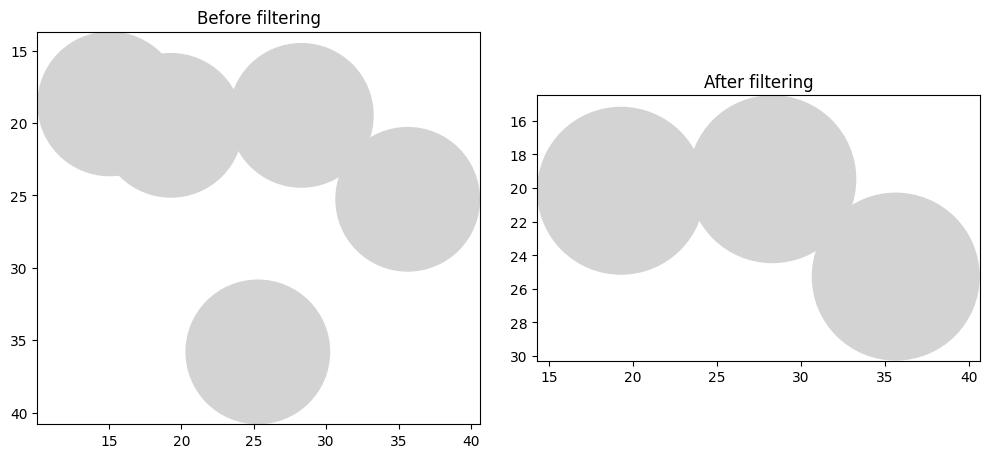

In [109]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_shapes().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_shapes().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()

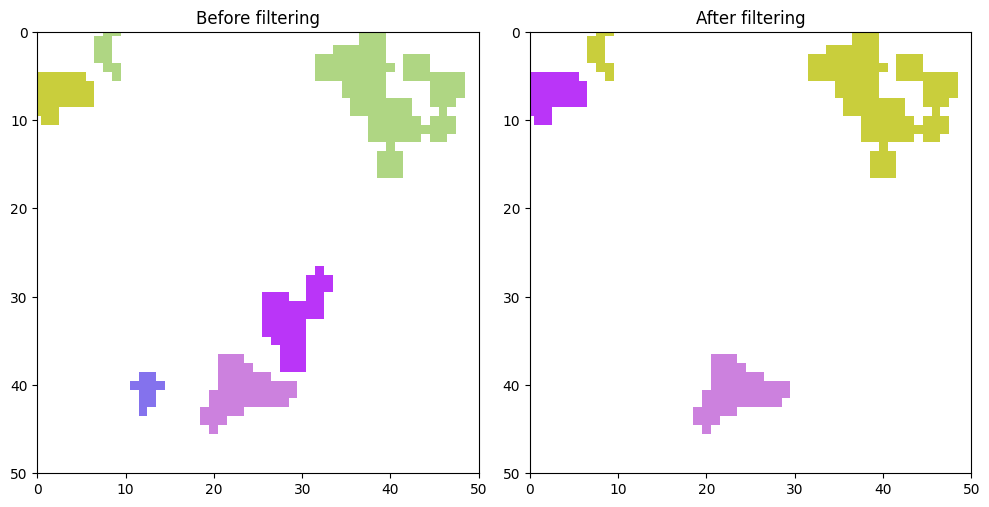

In [110]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_labels().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_labels().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()

/Users/selman.ozleyen/mambaforge/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman.ozleyen/mambaforge/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman.ozleyen/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `blobs_points-points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman.ozleyen/mambaforge/envs/squidpy/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:682: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(
/Users/selman.ozleyen/mambaforge/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: Futur

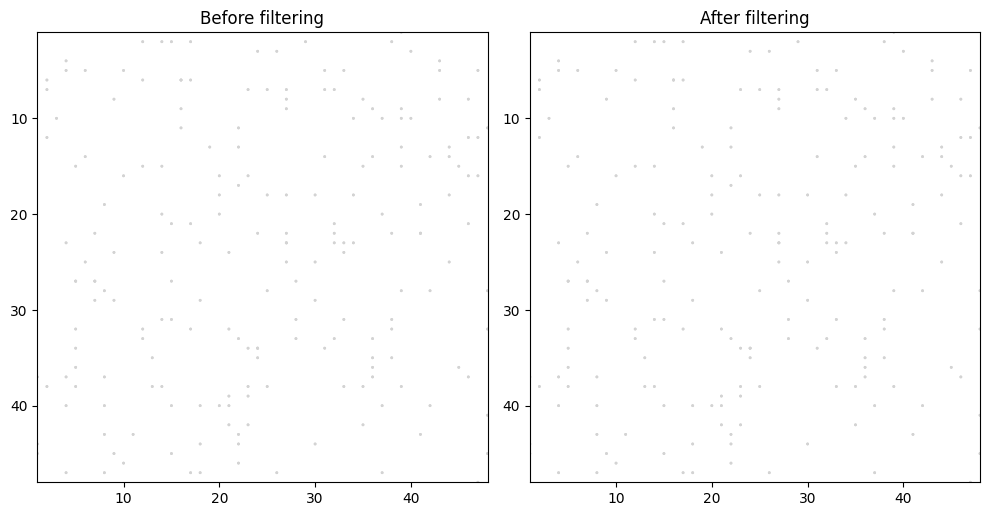

In [111]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_points().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_points().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()